## Question 3 --- Linear Regression

Importing the libraries first

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


### Loading the dataset and Analyzing the data set

In [2]:
dataset=pd.read_csv("Datasets/Question-3/airfoil.csv",header=None)
dataset

,0,1,2,3,4,5
0,8000.0,4.0,0.2286,39.6,0.004738,113.129
1,6300.0,0.0,0.0508,55.5,0.000762,132.796
2,400.0,4.0,0.2286,55.5,0.004286,123.274
3,1250.0,15.4,0.0508,39.6,0.028259,126.743
4,800.0,7.3,0.2286,39.6,0.012348,126.299
...,...,...,...,...,...,...
1197,3150.0,5.4,0.1524,31.7,0.005255,118.291
1198,2500.0,19.7,0.0508,39.6,0.036484,116.184
1199,800.0,2.0,0.2286,55.5,0.003135,128.492
1200,3150.0,3.3,0.1016,71.3,0.002028,132.114


In [3]:
dataset.describe()

,0,1,2,3,4,5
count,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000
mean,2938.061564,6.657654,0.139996,50.829201,0.010967,124.726941
std,3180.433353,5.800597,0.094807,15.540260,0.013082,6.968144
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.100000
50%,1600.000000,5.300000,0.101600,39.600000,0.004957,125.726500
75%,4000.000000,9.900000,0.228600,71.300000,0.014072,129.936250
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


### Linear Regression

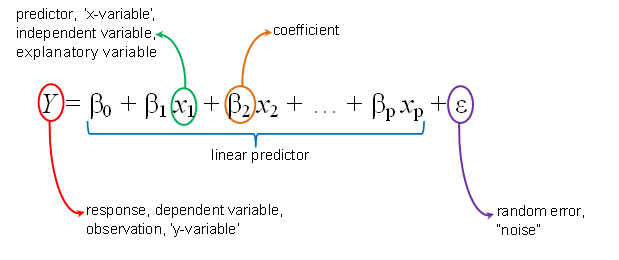

### Error

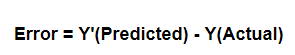


### Cost Function

A Cost Function/Loss Function evaluates the performance of our Machine Learning Algorithm.

A Cost function basically tells us ‘ how good’ our model is at making predictions for a given value of parameters(thetas).

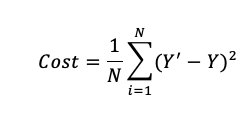

### Minimizing the Cost Function

The goal of any Machine Learning Algorithm is to minimize the Cost Function.



### Gradient Descent

#### Algorithm:

Repeat until converges
<br>
{
<br>
$\;\;\;\;\;\;$ for j=0 and j=n:
<br>
$\;\;\;\;\;\;$ $θj=θj − α \frac{∂}{∂θj}J(θ)$
<br>
}

#### α is the learning rate, value that specifies how small are steps we take


#### Simultaneous Update

Note that the update for $(θ0,θ1)$ has to be simultaneous. That is 
<br>
$τ0=θ0−α\frac{∂}{∂θ0}J(θ)$
<br>
$τ1=θ1−α\frac{∂}{∂θ0}J(θ)$
<br>
$θ0=τ0$
<br>
$θ1=τ1$
<br>
As you see, $θ0$
is used to calculate new value for $θ1$, so we cannot update it before we calculate new value for $θ0$

This is called simultaneous update 


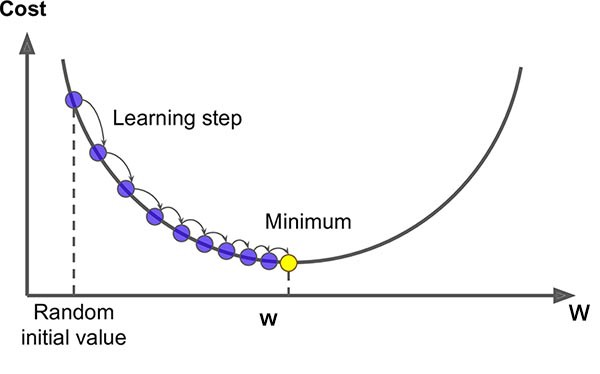

In [4]:
def gradientDescent(X, y, theta, iterations, a):
    past_costs = []
    past_thetas = [theta]
    theta=theta.T
    y=y.reshape(len(y),1)
    print(theta.shape)
    print(y.shape)
    print(X.shape)
    m=X.shape[0]
    for i in range(iterations):
        prediction = np.dot(X, theta)
#         print(prediction[0])
        error = prediction - y
#         print(error[0])
        cost = 1/(2*m) * np.dot(error.T, error)
        past_costs.append(cost)
        theta = theta - (a * (1/m) * np.dot(X.T, error))
#         print(theta)
        past_thetas.append(theta)
        
    return past_thetas, past_costs

### Dividing dataset into data and labels

In [5]:
X = dataset[[0,1,2,3,4]]
y = dataset[5]
X

,0,1,2,3,4
0,8000.0,4.0,0.2286,39.6,0.004738
1,6300.0,0.0,0.0508,55.5,0.000762
2,400.0,4.0,0.2286,55.5,0.004286
3,1250.0,15.4,0.0508,39.6,0.028259
4,800.0,7.3,0.2286,39.6,0.012348
...,...,...,...,...,...
1197,3150.0,5.4,0.1524,31.7,0.005255
1198,2500.0,19.7,0.0508,39.6,0.036484
1199,800.0,2.0,0.2286,55.5,0.003135
1200,3150.0,3.3,0.1016,71.3,0.002028


In [6]:
X=X.values
y=y.values
X
    

array([[8.00000e+03, 4.00000e+00, 2.28600e-01, 3.96000e+01, 4.73801e-03],
       [6.30000e+03, 0.00000e+00, 5.08000e-02, 5.55000e+01, 7.61930e-04],
       [4.00000e+02, 4.00000e+00, 2.28600e-01, 5.55000e+01, 4.28620e-03],
       ...,
       [8.00000e+02, 2.00000e+00, 2.28600e-01, 5.55000e+01, 3.13525e-03],
       [3.15000e+03, 3.30000e+00, 1.01600e-01, 7.13000e+01, 2.02822e-03],
       [6.30000e+02, 4.00000e+00, 3.04800e-01, 3.96000e+01, 5.79636e-03]])

### Normalizing the data using MinMaxScaler

In [7]:
model=MinMaxScaler()
X_minmax = model.fit_transform(X)

### Splitting the dataset into train and test

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_minmax, y, test_size=0.2, random_state=0)

### Adding ones column to the dataset for the constant term 

In [9]:
one_array=np.ones((X_train.shape[0],1), dtype=float)
X_train=np.append(one_array,X_train,axis=1)
one_array=np.ones((X_test.shape[0],1), dtype=float)
X_test=np.append(one_array,X_test,axis=1)

### Initializing the theta and applying the gradient descent 

In [10]:
theta = [[1,0,0,0,1,1]]
theta=np.array(theta)

a=1
past_thetas, past_costs = gradientDescent(X_train, y_train, theta, 10000, a)
theta = past_thetas[-1]
print('Mean Squared Error train:', mean_squared_error(y_train,X_train.dot(theta)))
print('r2 score :', r2_score(y_train,X_train.dot(theta)))
print('Mean Squared Error test:', mean_squared_error(y_test,X_test.dot(theta)))
print('r2 score :', r2_score(y_test,X_test.dot(theta)))

(6, 1)
(961, 1)
(961, 6)
Mean Squared Error train: 24.038404099737075
r2 score : 0.5065771046158994
Mean Squared Error test: 19.01525332857586
r2 score : 0.60137402241266


### Plotting the graph between cost and iterations

### a=0.01 and theta=[0,0,0,0,0,0]

In [19]:
theta = [[0,0,0,0,0,0]]
theta=np.array(theta)

a=0.01
past_thetas, past_costs1 = gradientDescent(X_train, y_train, theta, 10000, a)
theta = past_thetas[-1]

(6, 1)
(961, 1)
(961, 6)


### a=0.01 and theta=[1,0,1,0,1,0]

In [20]:
theta = [[1,0,1,0,1,0]]
theta=np.array(theta)

a=0.01
past_thetas, past_costs2 = gradientDescent(X_train, y_train, theta, 10000, a)
theta = past_thetas[-1]

(6, 1)
(961, 1)
(961, 6)


### a=0.01 and theta=[2,3,3,4,2,1]

In [21]:
theta = [[2,3,3,4,2,1]]
theta=np.array(theta)

a=0.01
past_thetas, past_costs3 = gradientDescent(X_train, y_train, theta, 10000, a)
theta = past_thetas[-1]

(6, 1)
(961, 1)
(961, 6)


[7801.2083817  7564.69863048 7335.57589298 ...   13.26768461   13.26733346
   13.26698243]
[7580.71689732 7351.14229563 7128.73765567 ...   13.28639309   13.28603912
   13.28568528]
[7066.14843554 6852.97447104 6646.45725286 ...   13.42955006   13.4291558
   13.42876167]


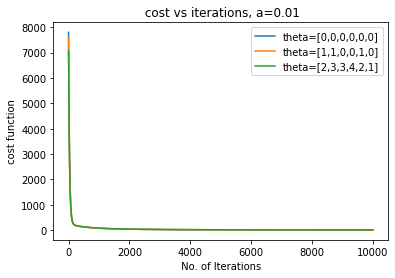

In [22]:
import matplotlib.pyplot as plt 

x1 = [i for i in range(len(past_costs))] 
y1=np.array(past_costs1).ravel()
print(y1)

x2 = [i for i in range(len(past_costs))] 
y2=np.array(past_costs2).ravel()
print(y2)

x3 = [i for i in range(len(past_costs))] 
y3=np.array(past_costs3).ravel()
print(y3)
  
# plotting the points  
plt.plot(x1, y1) 
plt.plot(x2, y2) 
plt.plot(x3, y3) 

plt.legend(['theta=[0,0,0,0,0,0]','theta=[1,1,0,0,1,0]','theta=[2,3,3,4,2,1]'],loc='upper right')

# naming the x axis 
plt.xlabel(' No. of Iterations ') 
# naming the y axis 
plt.ylabel(' cost function ') 
  
# giving a title to my graph 
plt.title(' cost vs iterations, a=0.01') 
  
# function to show the plot 
plt.show() 

### a=0.001 and theta=[3,4,4,3,2,4]

In [15]:
theta = [[0,0,0,0,0,0]]
theta=np.array(theta)

a=0.001
past_thetas, past_costs1 = gradientDescent(X_train, y_train, theta, 10000, a)
theta = past_thetas[-1]

(6, 1)
(961, 1)
(961, 6)


### a=0.01 and theta=[3,4,4,3,2,4]

In [16]:
theta = [[1,0,1,0,1,0]]
theta=np.array(theta)

a=0.01
past_thetas, past_costs2 = gradientDescent(X_train, y_train, theta, 10000, a)
theta = past_thetas[-1]

(6, 1)
(961, 1)
(961, 6)


### a=0.1 and theta=[3,4,4,3,2,4]

In [17]:
theta = [[2,3,3,4,2,1]]
theta=np.array(theta)

a=0.1
past_thetas, past_costs3 = gradientDescent(X_train, y_train, theta, 10000, a)
theta = past_thetas[-1]

(6, 1)
(961, 1)
(961, 6)


[7801.2083817  7777.38854747 7753.64364348 ...   79.87439566   79.86773828
   79.86108186]
[7580.71689732 7351.14229563 7128.73765567 ...   13.28639309   13.28603912
   13.28568528]
[7066.14843554 5086.57474929 3680.89041314 ...   12.01920207   12.01920207
   12.01920207]


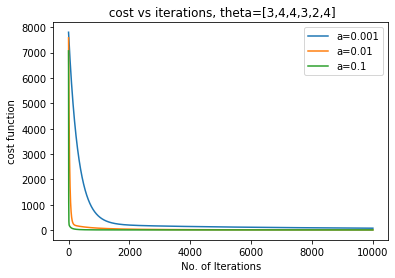

In [18]:
import matplotlib.pyplot as plt 

x1 = [i for i in range(len(past_costs))] 
y1=np.array(past_costs1).ravel()
print(y1)

x2 = [i for i in range(len(past_costs))] 
y2=np.array(past_costs2).ravel()
print(y2)

x3 = [i for i in range(len(past_costs))] 
y3=np.array(past_costs3).ravel()
print(y3)
  
# plotting the points  
plt.plot(x1, y1) 
plt.plot(x2, y2) 
plt.plot(x3, y3)

plt.legend(['a=0.001','a=0.01','a=0.1'],loc='upper right')
# naming the x axis 
plt.xlabel(' No. of Iterations ') 
# naming the y axis 
plt.ylabel(' cost function ') 
  
# giving a title to my graph 
plt.title(' cost vs iterations, theta=[3,4,4,3,2,4]') 
  
# function to show the plot 
plt.show() 

If we want to apply regression on some dataset but one of it’s features has missing
values under below given conditions : 

### (a) When 0-0.5% of values are missing of that feature

Ans(a) I will fill it with mean if data is numerical and with mode if data is categorical or we can drop the row corresponding to that feature.

### (b) When 8-10% of values are missing of that feature

Ans(b) In this case, I will fill it with mean (numerical data) and mode (categorical data). 

### (c) When 60-70% of values are missing of that feature

Ans(c) I will drop that feature or column because I can't fill it with mean and mode.
